In [14]:
import pandas as pd
import numpy as np

In [15]:
data = pd.read_csv('../data/multi_1/results/20251218_161455.csv')
data

,setname,solvername,problemname,status,solutionstatus,objvalue,runtime
0,C135_ABI_10,GREEDY_RR,C135_ABI_10_003,1,1,2,0.028078
1,C135_ABI_10,GREEDY_RR,C135_ABI_10_008,1,1,2,0.023750
2,C135_ABI_10,GREEDY_RR,C135_ABI_10_005,1,1,1,0.005441
3,C135_ABI_10,GREEDY_RR,C135_ABI_10_004,1,1,2,0.011353
4,C135_ABI_10,GREEDY_RR,C135_ABI_10_010,1,1,3,0.010731
...,...,...,...,...,...,...,...
105,C135_COS_30,GREEDY_RS,C135_COS_30_001,1,1,3,0.043677
106,C135_COS_30,GREEDY_RS,C135_COS_30_010,1,1,3,0.042555
107,C135_COS_30,GREEDY_RS,C135_COS_30_006,1,1,3,0.041915
108,C135_COS_30,GREEDY_RS,C135_COS_30_008,1,1,1,0.036612


In [16]:
networks_set= ["C135_ABI_10", "C135_COS_30", "C135_TA2_40"]
solvers_set = ["GREEDY", "GREEDY_RR", "GREEDY_RS", "ILP_GUROBI", "QL_PER_PHY", "QL_CLC_MULTI"]

In [17]:
networks = data.groupby('setname')
networks.groups

{'C135_ABI_10': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79], 'C135_COS_30': [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109]}

In [18]:
solvers = data.groupby('solvername')
solvers.groups

{'GREEDY': [70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'GREEDY_RR': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39], 'GREEDY_RS': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109], 'ILP_GUROBI': [60, 61, 62, 63, 64, 65, 66, 67, 68, 69], 'QL_CLC_MULTI': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89], 'QL_PER_PHY': [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]}

In [26]:
f = open('./summary_results.csv', 'wt')
f.write('setname,solvername,n_instances,obj_mean,obj_std,rt_mean,rt_std\n')
for net in networks_set:
    print(net)
    for sol in solvers_set:
        print(sol)
        data_sub = data[(data['setname'] == net) & (data['solvername'] == sol)]
        if len(data_sub) == 0:
            continue
        obj_mean = np.mean(data_sub['objvalue'])
        obj_std = np.std(data_sub['objvalue'])
        rt_mean = np.mean(data_sub['runtime'])
        rt_std = np.std(data_sub['runtime'])
        f.write(f'{net},{sol},{len(data_sub)},{obj_mean:.2f},{obj_std:.2f},{rt_mean:.5f},{rt_std:.5f}\n')
f.close()       

C135_ABI_10
GREEDY
GREEDY_RR
GREEDY_RS
ILP_GUROBI
QL_PER_PHY
QL_CLC_MULTI
C135_COS_30
GREEDY
GREEDY_RR
GREEDY_RS
ILP_GUROBI
QL_PER_PHY
QL_CLC_MULTI
C135_TA2_40
GREEDY
GREEDY_RR
GREEDY_RS
ILP_GUROBI
QL_PER_PHY
QL_CLC_MULTI


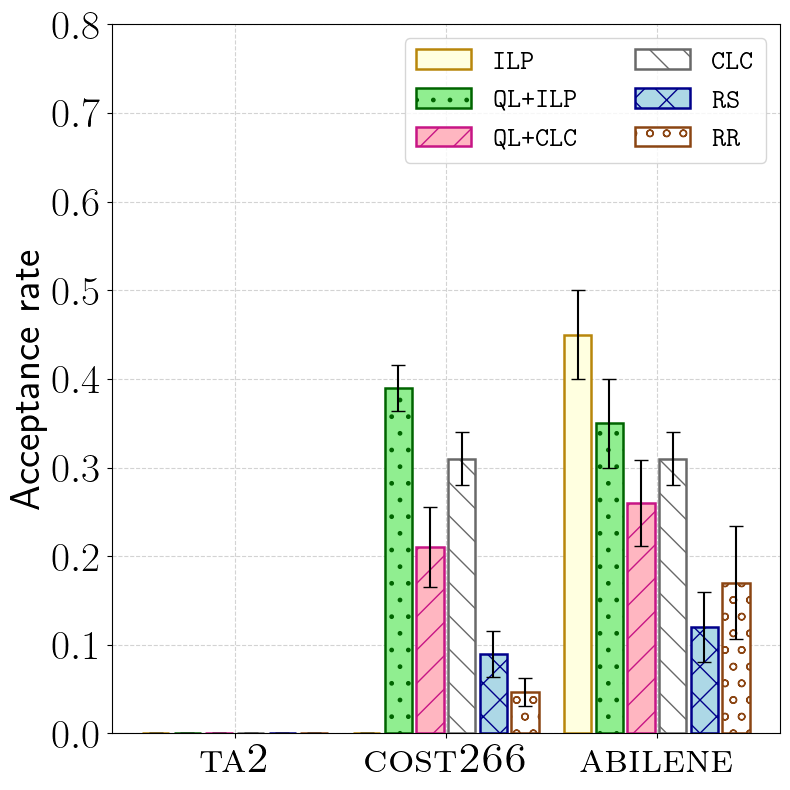

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['text.usetex'] = True
plt.rc('font', family='sans-serif')

labelsize, ticksize, legendsize = 30, 30, 20

# Đọc dữ liệu từ file CSV
df = pd.read_csv("./summary_results.csv")

# Tách cột 'setname' để lấy tên mạng
df['network'] = df['setname'].apply(lambda x: x.split('_')[1])

# Chuyển tên các phương pháp thành định dạng mong muốn
df['method'] = df['solvername'].replace({
    "ILP_GUROBI": "ILP",
    "QL_PER_PHY": "QL+ILP",
    "QL_CLC_MULTI": "QL+CLC",
    "GREEDY": "CLC",
    "GREEDY_RS": "RS",
    "GREEDY_RR": "RR"
})

# Chỉ lấy dữ liệu C135
df = df[df['setname'].str.startswith("C135")]

# Danh sách các mạng và phương pháp
networks = ["TA2", "COS","ABI"]
networks_x_axis = ["ta2", "cost266", "abilene"]
methods = ["ILP", "QL+ILP", "QL+CLC", "CLC", "RS", "RR"]

# Màu sắc và hatch cho từng phương pháp
colors_edge = {
    "ILP": "darkgoldenrod",
    "QL+ILP": "darkgreen",
    "QL+CLC": "mediumvioletred",
    "CLC": "dimgray",
    "RR": "saddlebrown",
    "RS": "darkblue"
}

colors = {
    "ILP": "lightyellow",
    "QL+ILP": "lightgreen",
    "QL+CLC": "lightpink",
    "CLC": "w",
    "RR": "w",
    "RS": "lightblue"
}

hatches = {"ILP": "", "QL+ILP": ".", "CLC": "\\", "QL+CLC": "/", "RR": "o", "RS": "x"}

# Tạo hình vẽ
fig, ax = plt.subplots(figsize=(8, 8))
fig.set_size_inches(8, 8)
width = 0.13
x = np.arange(len(networks))

# Vẽ biểu đồ
for i, method in enumerate(methods):
    method_data = df[df['method'] == method]

    total_acceptance = []
    total_acceptance_err = []
    for network in networks:
        data_network = method_data[method_data['network'] == network]

        if network == "TA2":
            divisor = 40
        elif network == "COS":
            divisor = 30
        else:
            divisor = 10

        total = data_network['obj_mean'].sum() / divisor if not data_network.empty else 0
        err = data_network['obj_std'].sum() / divisor if not data_network.empty else 0
        total_acceptance.append(total)
        total_acceptance_err.append(err)

    ax.bar(
        x + i * (width + 0.02),
        total_acceptance,
        width,
        label=rf'\texttt{{{method}}}',
        color=colors[method],
        edgecolor=colors_edge[method],
        hatch=hatches[method],
        linewidth=1.8,
        yerr=total_acceptance_err,
        capsize=5,
    )

# Label & settings
ax.set_axisbelow(True)
ax.set_ylim([0, 0.8])
plt.grid(color='lightgrey', linestyle='--', zorder=0)

ax.set_ylabel(r'Acceptance rate', fontsize=labelsize)
ax.set_xticks(x + width * 2.9)
ax.set_xticklabels([rf'\textsc{{{net}}}' for net in networks_x_axis])

plt.tick_params(axis='x', labelsize=ticksize)
plt.tick_params(axis='y', labelsize=ticksize)

ax.legend(fontsize=legendsize, loc='upper right', ncols=2)

plt.tight_layout()
# plt.savefig("./AccRate-R1.pdf", dpi=600, bbox_inches='tight')
plt.show()


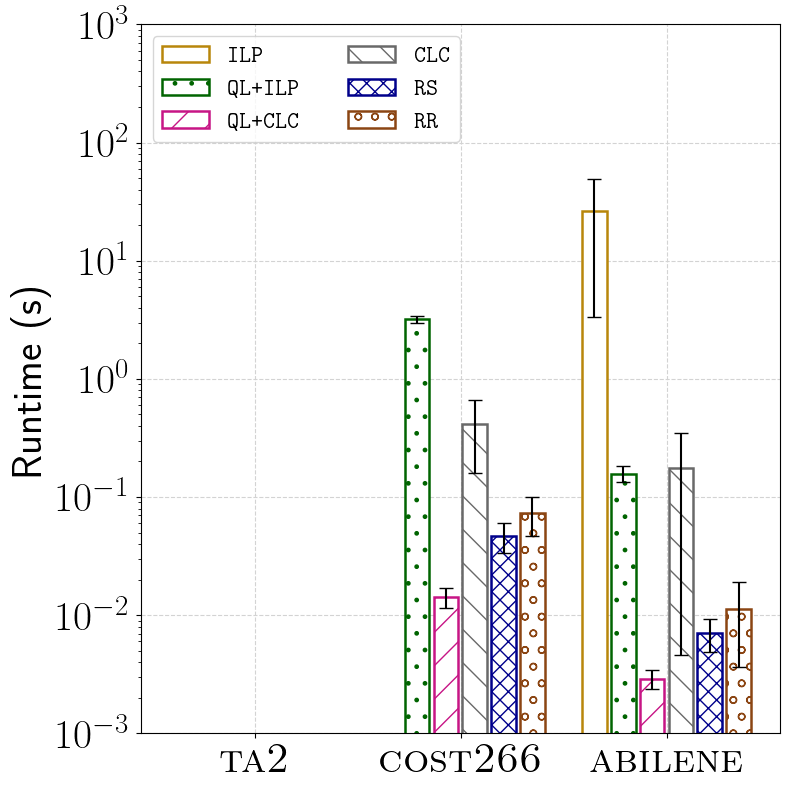

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['text.usetex'] = True
plt.rc('font', family='sans-serif')

labelsize, ticksize, legendsize = 30, 30, 17

# Đọc dữ liệu từ file CSV
df = pd.read_csv("./summary_results.csv")

df = df[df['setname'].str.contains("C135")]
# Tách cột 'setname' để lấy tên mạng
df['network'] = df['setname'].apply(lambda x: x.split('_')[1])

# Chuyển tên các phương pháp thành định dạng bạn mong muốn
df['method'] = df['solvername'].replace({
    "ILP_GUROBI": "ILP",
    "QL_PER_PHY": "QL+ILP",
    "QL_CLC_MULTI": "QL+CLC",
    "GREEDY": "CLC",
    "GREEDY_RS": "RS",
    "GREEDY_RR": "RR"
})

# Danh sách các mạng và phương pháp
networks = ["TA2", "COS","ABI"]
networks_x_axis = ["ta2", "cost266","abilene"]
methods = ["ILP", "QL+ILP", "QL+CLC", "CLC", "RS", "RR"]

# Màu sắc và hatch cho từng phương pháp
colors_edge = {
    "ILP": "darkgoldenrod",
    "QL+ILP": "darkgreen",
    "QL+CLC": "mediumvioletred",
    "CLC": "dimgray",
    "RR": "saddlebrown",
    "RS": "darkblue"
}

hatches = {"ILP": "", "QL+ILP": ".", "CLC": "\\", "QL+CLC": "/", "RR": "o", "RS": "xx"}


# Tạo hình vẽ
fig, ax = plt.subplots(figsize=(8, 8))
fig.set_size_inches(8, 8)
width = 0.12  # Độ rộng của mỗi thanh

# Tọa độ x cho mỗi mạng và phương pháp
x = np.arange(len(networks))

# Vẽ biểu đồ cho từng phương pháp
for i, method in enumerate(methods):
    method_data = df[df['method'] == method]
    runtime_value = [method_data[method_data['network'] == network]['rt_mean'].sum() for network in networks]
    runtime_std = [method_data[method_data['network'] == network]['rt_std'].sum() for network in networks]

    
    ax.bar(x + i * (width+0.02), runtime_value, width, label=rf'\texttt{{{method}}}', color="w", 
           edgecolor=colors_edge[method], hatch=hatches[method], linewidth=1.8, yerr=runtime_std, capsize=5)
# Cài đặt nhãn và tiêu đề

ax.set_ylim(10**-3, 10**3)
ax.set_yscale("log")
# ax.set_yscale("linear")

ax.set_axisbelow(True)
plt.grid(color='lightgrey', linestyle='--', zorder=0)
# ax.set_xlabel(r'Networks', fontsize=labelsize)
ax.set_ylabel(r'Runtime (s)', fontsize=labelsize)
ax.set_xticks(x + width * 2.95)
ax.set_xticklabels([r'\textsc{' + network + '}' for network in networks_x_axis], fontsize=12)   

plt.tick_params(axis='x', labelsize=ticksize)  # Change xtick labels size
plt.tick_params(axis='y', labelsize=ticksize)  # Change ytick labels size


ax.legend(fontsize=legendsize, loc='upper left', ncol=2)

# Lưu biểu đồ dưới dạng file ảnh
plt.tight_layout()
# plt.savefig("./Runtime_R1.pdf", dpi=600, bbox_inches='tight')  


plt.show()
